<a href="https://colab.research.google.com/github/hildj/DS3001_TeamM_Project/blob/main/resultsmilestone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/hildj/DS3001_TeamM_Project.git

fatal: destination path 'DS3001_TeamM_Project' already exists and is not an empty directory.


In [ ]:
import pandas as pd

df = pd.read_csv("DS3001_TeamM_Project/hospital data cleaned.csv")

df = df.drop("Risk Adjuested Mortality Rate.1", axis=1)

df = df.rename(columns={
    "Risk Adjuested Mortality Rate": "Risk Adjusted Mortality Rate",
    "Procedure/Condition": "condition",
    "Hospital Ratings": "rating"
})

df = df.rename(columns={
    "Risk Adjusted Mortality Rate": "mortality_rate"
})

df.head()

,YEAR,HOSPITAL,condition,mortality_rate,rating
0,2023,Adventist Health and Rideout,AMI,7.0,As Expected
1,2023,Adventist Health and Rideout,Acute Stroke,5.3,As Expected
2,2023,Adventist Health and Rideout,Carotid Endarterectomy,3.1,As Expected
3,2023,Adventist Health and Rideout,GI Hemorrhage,2.2,As Expected
4,2023,Adventist Health and Rideout,Heart Failure,4.0,As Expected


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_rating = df[['rating']]
y = df['mortality_rate']

preprocess_rating = ColumnTransformer(
    [('rating_enc', OneHotEncoder(drop='first'), ['rating'])],
    remainder='drop'
)

knn_rating_model = Pipeline([
    ('preprocess', preprocess_rating),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

X_train, X_test, y_train, y_test = train_test_split(
    X_rating, y, test_size=0.2, random_state=42
)

knn_rating_model.fit(X_train, y_train);

y_pred_rating = knn_rating_model.predict(X_test)

print("----- KNN Regression: Rating → Mortality Rate -----")
print("MAE:", mean_absolute_error(y_test, y_pred_rating))
print("RMSE:", mean_squared_error(y_test, y_pred_rating) ** 0.5)

----- KNN Regression: Rating → Mortality Rate -----
MAE: 2.650491803278689
RMSE: 3.9337335299658407


In [ ]:
X_condition = df[['condition']]
y = df['mortality_rate']

preprocess_condition = ColumnTransformer(
    [('cond_enc', OneHotEncoder(drop='first'), ['condition'])],
    remainder='drop'
)

knn_condition_model = Pipeline([
    ('preprocess', preprocess_condition),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

X_train, X_test, y_train, y_test = train_test_split(
    X_condition, y, test_size=0.2, random_state=42
)

knn_condition_model.fit(X_train, y_train)

y_pred_condition = knn_condition_model.predict(X_test)

print("----- KNN Regression: Condition → Mortality Rate -----")
print("MAE:", mean_absolute_error(y_test, y_pred_condition))
print("RMSE:", mean_squared_error(y_test, y_pred_condition) ** 0.5)

----- KNN Regression: Condition → Mortality Rate -----
MAE: 2.283091334894613
RMSE: 4.044360574802449


In [ ]:
print("\nTuning K for Model 1 (Rating → Mortality Rate)")
X_train_rating, X_test_rating, y_train_rating, y_test_rating = train_test_split(
    X_rating, y, test_size=0.2, random_state=42
)

for k in range(1, 21):
    model = Pipeline([
        ('preprocess', preprocess_rating),
        ('knn', KNeighborsRegressor(n_neighbors=k))
    ])
    model.fit(X_train_rating, y_train_rating)
    pred = model.predict(X_test_rating)
    print(f"K={k}: MAE={mean_absolute_error(y_test_rating, pred):.3f}")


Tuning K for Model 1 (Rating → Mortality Rate)
K=1: MAE=3.558
K=2: MAE=2.970
K=3: MAE=2.687
K=4: MAE=2.664
K=5: MAE=2.650
K=6: MAE=2.680
K=7: MAE=2.684
K=8: MAE=2.660
K=9: MAE=2.939
K=10: MAE=2.903
K=11: MAE=2.859
K=12: MAE=2.898
K=13: MAE=2.810
K=14: MAE=2.927
K=15: MAE=2.882
K=16: MAE=2.866
K=17: MAE=2.832
K=18: MAE=2.901
K=19: MAE=2.835
K=20: MAE=2.820


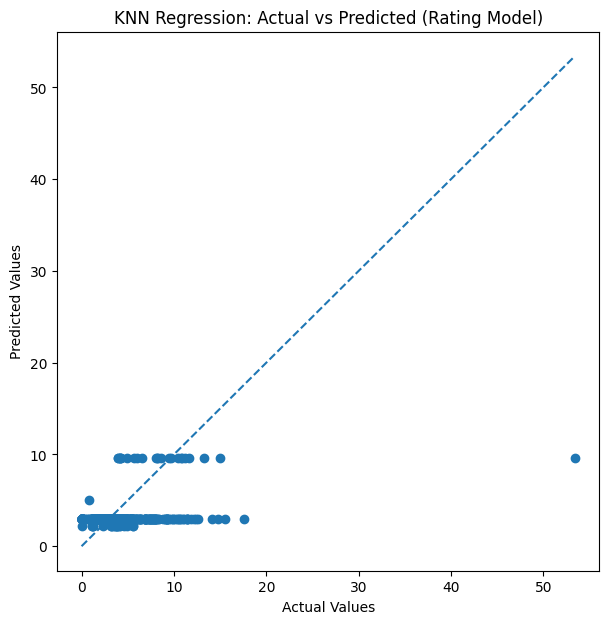

In [ ]:
import matplotlib.pyplot as plt

y_pred = knn_rating_model.predict(X_test_rating)

plt.figure(figsize=(7,7))
plt.scatter(y_test_rating, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regression: Actual vs Predicted (Rating Model)")
plt.plot([y_test_rating.min(), y_test_rating.max()],
         [y_test_rating.min(), y_test_rating.max()],
         '--')
plt.show()

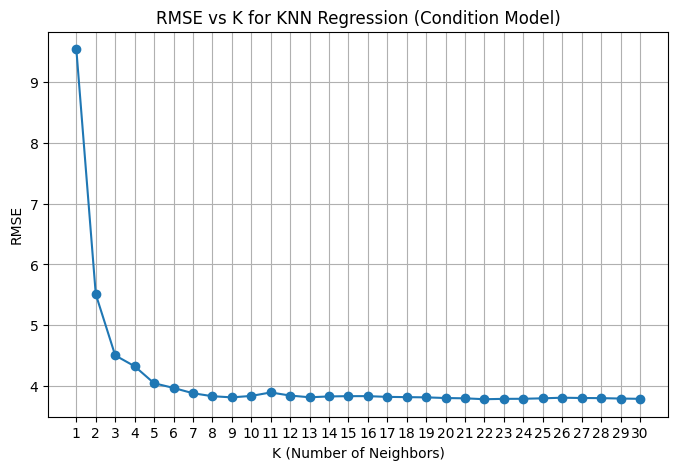

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
rmse_values = []
k_range = range(1, 31)


for k in k_range:

    model_pipeline = Pipeline([
        ('preprocess', preprocess_condition),
        ('knn', KNeighborsRegressor(n_neighbors=k))
    ])
    model_pipeline.fit(X_train, y_train)
    preds = model_pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    rmse_values.append(rmse)

plt.figure(figsize=(8,5))
plt.plot(k_range, rmse_values, marker='o')
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("RMSE")
plt.title("RMSE vs K for KNN Regression (Condition Model)")
plt.xticks(k_range)
plt.grid(True)
plt.show()

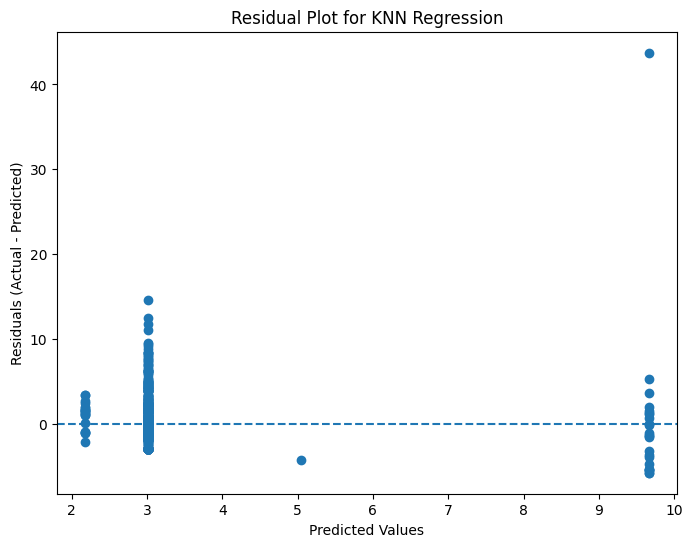

In [ ]:
import numpy as np

residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for KNN Regression")
plt.show()
